In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import statsmodels.stats.api as sm

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [180]:
data = pd.read_csv('C:\\Users\\murty\\Desktop\\Fulldata_2.csv')
# Reset Index
data = data.reset_index()
data = data.drop(["index"], axis =1)
data= data.drop(['Date'], axis=1)
def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)
data.head()

,High,Low,Open,Close,Adj Close
0,53.96875,52.84375,53.90625,53.59375,28.580601
1,54.18750,51.87500,53.18750,52.56250,28.030664
2,52.68750,51.25000,52.43750,51.56250,27.497383
3,54.71875,52.53125,52.56250,53.93750,28.763931
4,58.50000,54.59375,54.78125,58.25000,31.063711


In [181]:
#We separate 25% of the set for the OPEN PRICE prediction.
X_train, X_test, y_train, y_test = train_test_split(data.ix[:, data.columns != 'Open'], 
                                                    data['Open'], 
                                                    test_size=0.25)

C:\Users\murty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\murty\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [182]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)


In [183]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [184]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [185]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.23298211348992778

In [186]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.3698491068062338

Text(0, 0.5, 'Estimated Open')

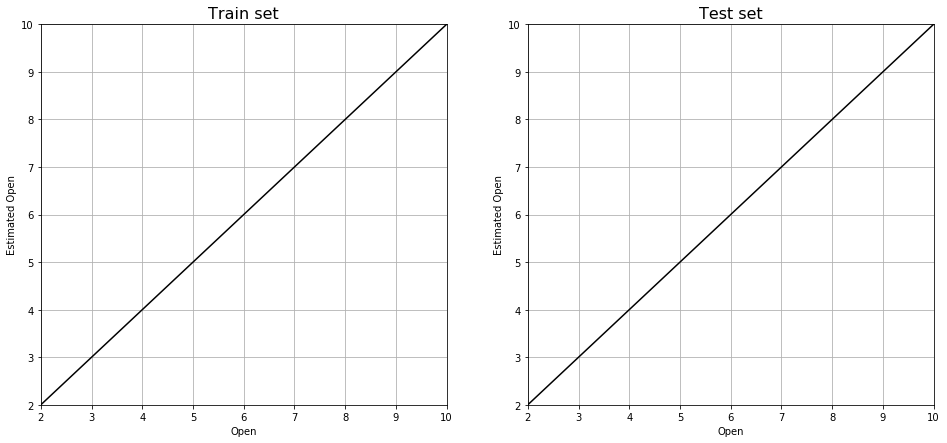

In [187]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=16)
pyplot.xlabel('Open')
pyplot.ylabel('Estimated Open')

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=16)
pyplot.xlabel('Open')
pyplot.ylabel('Estimated Open')